In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import Niche_YOLO_NAS
from super_gradients.training.models import get as get_model
from super_gradients.training import Trainer
DIR_OUT = os.path.join(ROOT, "out")
name_task = "n200_yolo_na_i1_trial100"
best_chekpoint = "ckpt_best.pth"
log_txt = "experiment_logs_Aug02_13_49_27.txt"


[2023-08-17 22:15:10] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-08-17 22:15:10] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-08-17 22:15:12] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-17 22:15:12] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-17 22:15:12] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-17 22:15:12] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-17 22:15:12] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
## Loading architecture
model = Niche_YOLO_NAS(
        path_model ='yolo_nas_l',
        dir_train = os.path.join(DIR_OUT, "train"),
        dir_val = os.path.join(DIR_OUT, "val"),
        name_task = ""
    )

[2023-08-17 22:15:14] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [4]:
best_model_path = os.path.join(ROOT, name_task, best_chekpoint)
best_model = model.load(best_model_path)

[2023-08-17 22:15:18] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth EMA checkpoint.


model /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth loaded


# Evaluation

In [5]:
log_file_path = os.path.join(ROOT, name_task, log_txt)


In [6]:
model.evaluate(log_file_path)[-1]

{'epoch': 99,
 'train_loss': 1.598581075668335,
 'valid_loss': 1.3900963068008423,
 'precision@0.50': 0.11201434582471848,
 'recall@0.50': 0.9994666576385498,
 'mAP@0.50': 0.9707310795783997,
 'F1@0.50': 0.20145124197006226}

model /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth loaded


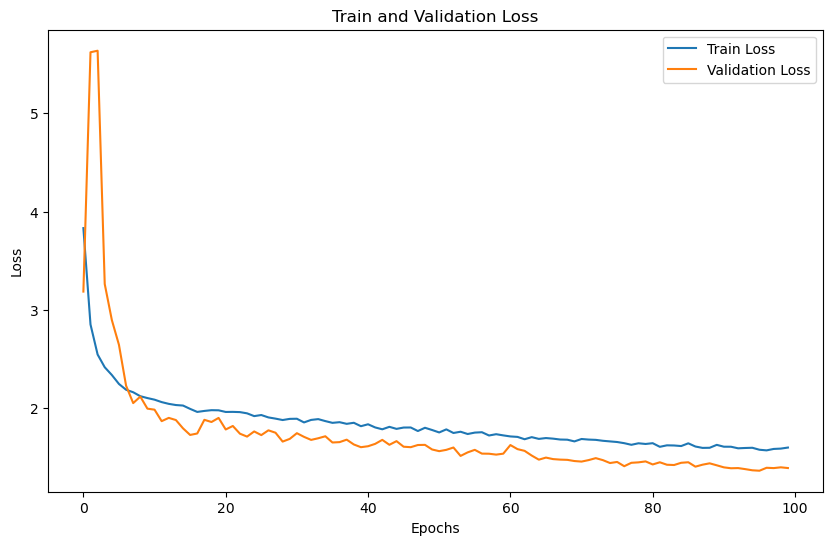

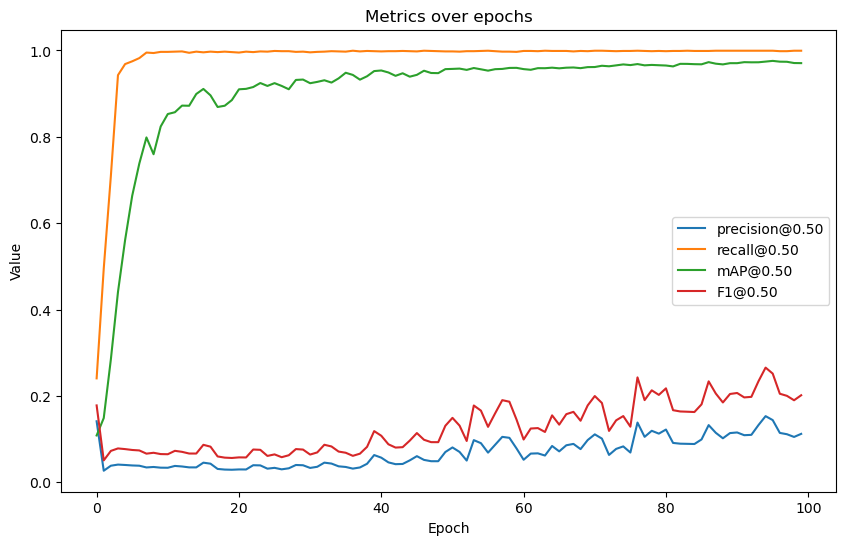

In [7]:
model.evaluation_plot(log_file_path)

In [14]:
path_val_txt = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"


In [16]:
test_data = coco_detection_yolo_format_val(
    dataset_params={
        "data_dir": os.path.dirname(path_val_txt),
        "images_dir": "images",
        "labels_dir": "labels",
        "classes": [1],
    },
    dataloader_params={"batch_size": 16, "num_workers": 2},
)

metrics = trainer.test(model=model, test_loader=test_data)


Caching annotations:  88%|████████▊ | 194/221 [00:01<00:00, 162.70it/s]

AttributeError: 'Trainer' object has no attribute 'test_metrics'

Caching annotations: 100%|██████████| 221/221 [00:01<00:00, 164.97it/s]
